In [1]:
from imprint.nb_util import setup_nb

setup_nb()
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import imprint as ip
from imprint.models.ztest import ZTest1D

In [3]:
g = ip.cartesian_grid([-1], [1], n=[100], null_hypos=[ip.hypo("x < 0")])
# lam = -1.96 because we negated the statistics so we can do a less thanj
# comparison.
lam = -1.96
K = 8192
rej_df = ip.validate(ZTest1D, g, lam, K=K)

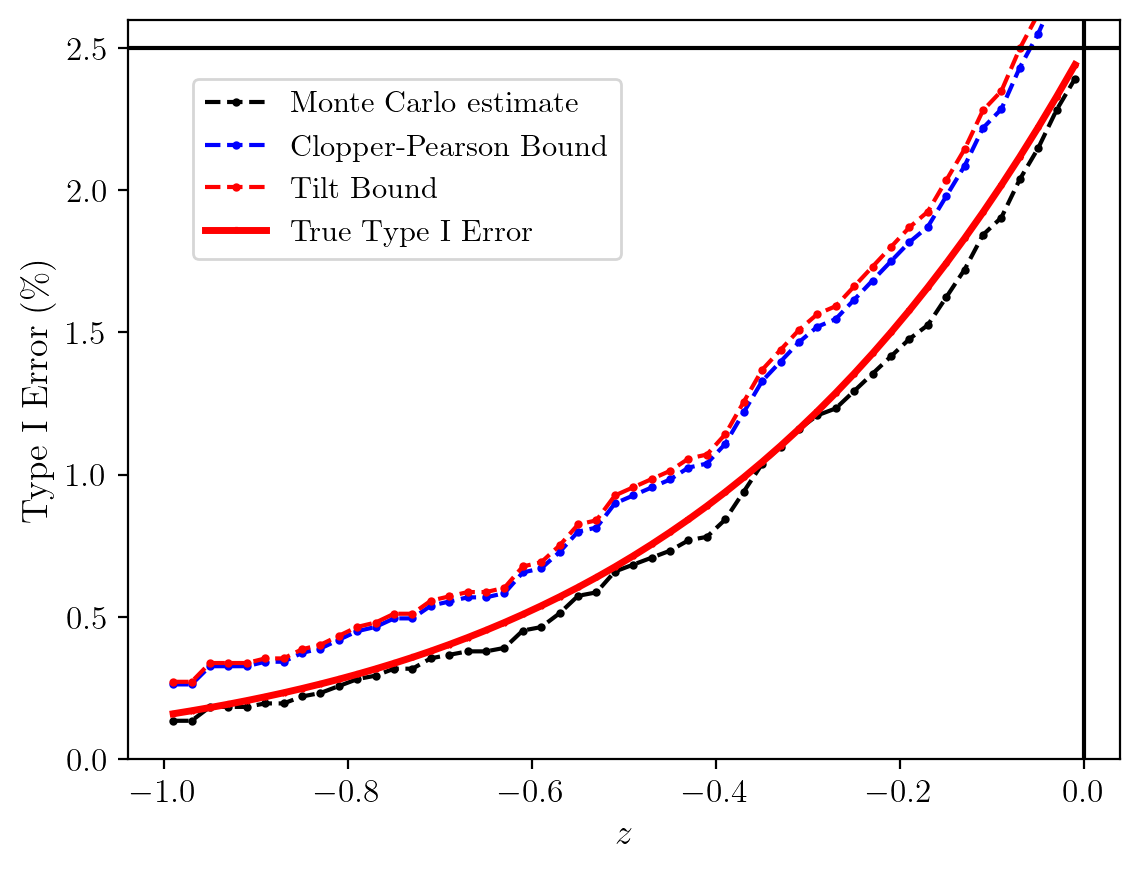

In [29]:
g_rej = g.add_cols(rej_df)
g_rej.df.sort_values("theta0", inplace=True)
true_err = 1 - scipy.stats.norm.cdf(-g_rej.get_theta()[:, 0] - lam)

plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_est"],
    "k--o",
    markersize=2,
    label="Monte Carlo estimate",
)
plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_cp_bound"],
    "b--o",
    markersize=2,
    label="Clopper-Pearson Bound",
)
plt.plot(
    g_rej.df["theta0"],
    100 * g_rej.df["tie_bound"],
    "r--o",
    markersize=2,
    label="Tilt Bound",
)
plt.plot(
    g_rej.df["theta0"],
    100 * true_err,
    "r-*",
    linewidth=2.5,
    markersize=2,
    label="True Type I Error",
)
plt.axhline(2.5, color="k")
plt.axvline(0, color="k")
plt.ylim([0, 2.6])
plt.legend(fontsize=11, bbox_to_anchor=(0.05, 0.94), loc="upper left")
plt.xlabel("$z$")
plt.ylabel("Type I Error (\%)")
plt.show()